#Modelo de Ising 2D
El modelo de Ising pertenece a una clase de modelos en donde los sitemas se modelan como una red con una base de microsistemas en los sitios en la red, dichos microsistemas pueden tener un número discreto o continuo de estados y habrá una cierta interacción definida en los sitios. Los microsistemas son átomos cuyos espines solo pueden apuntar hacia arriba o hacia abajo, tomando los valores $\pm 1$, respectivamente.

Cuando se trabaja con el modelo bidimensinal, es conveniente identificar a los espines $S_i$ a través de dos índices que indiquen su localización en la red. Si en esta hay un total de $N=N_xN_y$ sitios, es decir $N_x$ en la dirección horizontal y $N_y$ en la dirección vertical, entonces el modelo $2^N$ posibles configuraciones, cada una de las cuales está determinada por el conjunto:

\begin{equation}
\{S_i\}=\{S_{1,1},S_{1,2},S_{1,3},...,S_{1,N_x},...,S_{N_y,1},S_{N_y,2},...,S_{N_x,N_y}\}
\end{equation}

donde $S_{i,j}=\pm 1$.

El Hamiltoniano del modelo de red cuadrada, en presencia de un campo magnético externo, está dado entonces por

\begin{equation}
H=-J(\sum_i\sum_jS_{i,j}S_{i+1,j}+\sum_i\sum_jS_{i.j}S_{i,j+1})-h\sum_i\sum_jS_{i,j}
\end{equation}

donde $J$ es la constante de interacción entre los espines, $h$ es el campo magnético externo, que se supone en la misma dirección en los espines, y el término $-h\sum_i\sum_jS_{i,j}$ denota lo que se conoce como energía de Zeeman del sistema.

#Método de Monte Carlo
Los sistemas que se estudian en física estadística son, en general, sistemas con un gran número de grados de libertad. La descripción de estos sistemas frecuentemente involucra la evaluación de integrales en espacios de dimensión muy grande. Consideremos, por ejemplo, un gas formado por $N$ partículas de masa $m$ que se encuentra a una temperatura $T$ y cuyo hamiltoniano es

\begin{equation}
H(x)=\sum\frac{p_i^2}{2m}+\sum u(r_{ij})
\end{equation}

En esta ecuación $x=(\vec r,\vec p)$, $\vec r=(\vec r_1,\vec r_2,...,\vec r_N)$, $\vec p=(\vec p_1, \vec p_2,...,\vec p_N)$, $r_{ij}=|\vec r_i-\vec r_j|$, siendo $\vec r_i$ es el vector posición de la $i$-ésima prtícula, $\vec p_i=m\dot{\vec r_i}$ su momento, y $u(r_{ij})$ el potencial entre las partículas separadas por una distancia $r_{ij}$. La función de partición canónica para este sitema está dada por

\begin{equation}
Z(N,V,T)=\int e^{-\beta H(x)}d\vec rd\vec p
\end{equation}

donde $\beta =\frac{1}{K_bT}$ y el valor esperado de cualquier observable $\boldsymbol A$ se puede evaluar

\begin{equation}
\langle A\rangle\boldsymbol =\frac{1}{Z}\int \boldsymbol A(x)e^{-\beta H(x)}d\vec rd\vec p
\end{equation}

Para describir las propiedades termodinámicas de este sistema es necesario evaluar dichas integrales, pero su evaluación analítica la mayoría de las veces es irrealizable, por lo que se lleva a cabo numéricamente. Sin embargo, esta evaluación tampoco es directa, ya que no es posible utilizar métodos numéricos convencionales excepto para valores muy pequeños de $N$, en casos como este se emplea el llamado método Monte Carlo.

El método de Monte Carlo permite evaluar numéricamente cierto tipo de integrales medianteuna discretización aleatoria del espacio en cuestión. En mecánica estadística el método de Monte Carlo se emplea para estudiar modelos de sistemas termodinámicos por medio de una simulación estocástica en una computadora.

El algoritmo que permite aplicar eficientemente el método de Monte Carlo en la evaluación de este tipo de integrales de interés, fue propuesto por N. Metropolis, A. W. Rosenbluth, A. Teller y E. Teller en 1953. El enfoque de Metropolis se basa en la idea de muestrear las regiones del espacio de integración donde se encuentran los estados importantes del sistema. De acuerdo con el algoritmo de Metropolis, los puntos adecuados para la evaluación de una integral se eligen conforme a una probabilidad $P(x_\nu)$, $\nu=1,2,...,n$, de tal manera que sea más probable considerar puntos en donde la función tenga valores más significativos que en otras regiones. La probabilidad adecuada es en este caso

\begin{equation}
P(x_\nu)=\frac{1}{Z}e^{-\beta H(x_\nu)}
\end{equation}

donde $Z$ es la función de partición canónica. El valor esperado del observable puede aproximarse como

\begin{equation}
\langle A\rangle\approx\tilde{A}=\frac{1}{n}\sum_{\nu=1}^nA(x_\nu)
\end{equation}

donde $x_\nu$ son los puntos que se tomarán para la evaluación numérica. La implementación del algoritmo no es directa porque no conocemos explícitamente la probabilidad $P(x_\nu)$, sin embargo, los puntos necesarios para la evaluación pueden generarse a través de una cadena de Markov de longitud $M$, que esta caracterizada por una probabilidad de transición $W(x_\nu\rightarrow x_\nu')$ de un punto a otro de tal manera que en el límite $M \rightarrow \infty$ la probabilidad de elegir la configuración $x_\nu$ sea $P(x_\nu)$. Una definción adecuada es

\begin{equation}
W(x_\nu\rightarrow x_\nu')=\left\{
\begin{aligned}
exp[-\beta\delta H(x_\nu\rightarrow x_\nu')]&,\text{si}\ \delta H(x_\nu\rightarrow x_\nu')>0\\
 1&,\ \text{otro caso}
\end{aligned}\right.
\end{equation}

donde $\delta H(x_\nu\rightarrow x_\nu')=H(x_\nu)-H(x_\nu')$.

Ahora bien, dado un punto $x_n$  en el espacio fase, para generar $x_{n-1}$ se da un paso tentativo al punto $x_t$, el cual se elige de acuerdo a la probabilidad uniforme de un cubo de lado $a$ alrededor de $x_n$ y se calcula el cambio $\delta H(x_n\rightarrow x_t)$ en la energía del sistema asociado con el paso $x_n\rightarrow x_t$. Si $\delta H(x_n\rightarrow x_t)<0$, el cambio se acepta y $x_{n+1}=x_t$. Por otro lado, si $\delta H(x_n\rightarrow x_t)>0$, entonces el cambio se hace con probabilidad $exp[-\beta\delta H(x_n\rightarrow x_t)]$. En la práctica, esto se lleva a cabo comparando la cantidad $exp[-\beta H(x_n\rightarrow x_t)]$ con un número aleatorio $\eta$ distribuido uniformemente en el intervalo $[0,1)$. Si $\eta<exp[-\beta \delta H(x_n\rightarrow x_t)]$ el cambio se lleva a cabo y $x_{n+1}=x_t$, en caso contrario, $x_{n+1}=x_n$. El proceso se repite hasta formar el conjunto de puntos necesarios. El parámetro $a$ se fija empíricamente teniendo en cuenta que si es muy grande es poco probable que acepte el estado de prueba y si es muy pequeño el espacio fase se recorrerá muy lentamente.

El algoritmo hasta aquí descrito es un procedimiento que permite generar una configuración a partir de otra, pero que no proporciona un criterio para elegir la configuración inicial, lo cual conduce a que dicha configuración pueda construirse con cierta arbitrariedad y que no corresponda a un estado de equilibrio del sistema en consideración. Así pues, para llegar al equilibrio es necesario avanzar un cierto número de cofiguraciones, las cuales deberán ignorarse cuando al calcular los observables para que éstas no dependan de la condición inicial. Debido a que puede existir una alta corelación entre los puntos adyacentes de la cadena de Markov conviene calcular los observables del sistema en configuraciones lo suficientemente separadas para disminuir dicha correlación, por ejemplo, considerando configuraciones separadas por algunos puntos dentro de la cadena, de tal manera que

\begin{equation}
\tilde{A}=\frac{1}{n}\sum_{i=1}^nA(x_{\nu i} )
\end{equation}

donde $\nu_i=\nu_0+i\mu_0$, $i=1,2,...,n$ y $n=(M-\nu_0)/\mu_0$. En la ecuación $\nu_0$ es el número de pasos necesarios para llevar al sistema a un estado de equilibrio y $\mu_0$ es el número de pasos que separan a las configuraciones en donde se calculan las observables. Una estimación de la incertidumbre asociada a $A$ está dado por:

\begin{equation}
(\sigma A)^2=\frac{1}{n}\sum_{i=1}^n\left[\frac{1}{n}\sum_{i=1}^nA_i^2-\left(\frac{1}{n}\sum_{i=1}^nA_i\right)^2\right]
\end{equation}

donde se considera $A_i=A(x_{\nu i})$ como una variable aleatoria y se ha utilizado el teorema límite central para $n$ grande. Esto indica que el error del cálculo de $A$ disminuye conforme el número de puntos $n$ aumenta. Algunos factores que pueden afectar la confiabilidad de los cálculos y que, por lo tanto, hay que tomar en cuenta son los siguientes: 1) En la simulación se estan utilizando números que son pseudoaleatorios, ya que se generan a través de un procedimiento determinista. Para determinar la influencia de estos números sobre los promedios se han hecho estudios con sistemas cuya solución se conoce, encontrándose que cuando, se realizan en orden de $10^3-10^4$ pasos de Monte Carlo por partícula:

\begin{equation}
\frac{(\tilde{A}-\langle A\rangle)}{\langle A\rangle}\sim 10^{-2}
\end{equation}

donde $\tilde{A}$ es el promedio calculado con los números pseudoaleatorios. En el método de Monte Carlo queda en la práctica revisar si la discritización es alcanzable en un número razonable de pasos. Esto ha sido comprobado favorablemente en muchos pasos. 2)El inconveniente de simular sistemas macroscópicos formados con alrededor de $10^{23}$ partículas a través de sistemas de alrededor de $10^3$ partículas que se puede reducir mediante el uso de condiciones a la frontera periódicas.

#Ejemplo de código

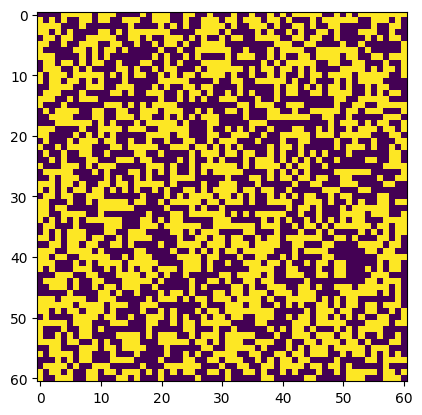

<Figure size 640x480 with 0 Axes>

In [7]:
#Codigo hecho por: Felipe Gonzalez Cataldo, Septiembre 2018
#Modelo Insig 2D sin campo magnetico externo
from pylab import *

fig=figure(1)
ax=subplot(111)
#Jij=J para todo i,j: constante de interacción (Jij>0:ferromagnetico,
# Jij<0:antiferromagnetico, Jij=0: no magnetico)
J=1       #en eV, ferromagnetico
kT=1.2*J  #en eV
#Solucion de ONSAGER para enrejado 2D: kT=2*J/ln(1+sqrt(2))=2.2691853
n=61
mat=random(size=(n,n))  #matrix aleatoria en el intervalo [0.0 1.0]
mat=2*floor(2*mat)-1    #matrix aleatoria de 1´s y -1´s

img=imshow(mat)
show(block=False)

nBlocks=100
for iBlock in range(nBlocks):
  for ix in range(n):
    ixp=(ix+1)%n        #vecino a la derecha
    ixm=(ix-1)%n        #vecino a la izquierda
    for iy in range(n):
      iyp=(iy+1)%n      #vecino arriba
      iym=(iy-1)%n      #vecino abajo
      s=mat[ixm,iy]+mat[ixp,iy]+mat[ix,iyp]+mat[ix,iym] #suma de espines vecinos
      mOld=mat[ix,iy]     #valor viejo del espin
      EOld=-J*mOld*s      #Si*(S_arriba+S_abajo+S_izquierda+S_derecha)
      mNew=-mOld
      ENew=-J*mNew*s      #sum_ij Si'*Sj, donde Si'=-Si
      Ediff=ENew-EOld     #No es necesario sumar sobre todo el enrejado solo los
                          #(ix,iy) sitios de energia
      prob=exp(-Ediff/kT)
      if ENew<EOld:
        mat[ix,iy]=mNew
      else:
        mat[ix,iy]=mNew if random() <exp(-Ediff/kT) else mOld
#print iBlock
img.set_data(mat)
plt.pause(1e-30)
draw()
#savefig('is'+str(iBlock)+'.png')